## Tensorboard

* 원하는 값을 summary로 저장
    * `writer= tf.summary.create_file_writer(path)`
    * `with writer.as_default():`
    * `tf.summary.scalar('name', value, step=step)`
    * `tf.summary.histogram()
    * TF 1.x와 차이
        * `add_summary()`, `merge()` 없슴

* summary 기록 사례
```
summary_writer = tf.summary.create_file_writer('/tmp/summaries')
with summary_writer.as_default():
  tf.summary.scalar('loss', 0.1, step=42)
```  
* Tensorboard 실행
    * `tensorboard --logdir=path`
    * http://localhost:6006
    
![tensorboard](https://i.imgur.com/IOYIVlg.png)



In [11]:
!rm -rf ./summary/regression

initial W [-0.2135392]
epoch: 0  cost: 3779.1765  dW: [-3466.4526]  W: [-0.04021657]
epoch: 20  cost: 191.05609  dW: [-642.11554]  W: [1.5652192]
epoch: 40  cost: 67.93774  dW: [-118.94344]  W: [1.8626053]
epoch: 60  cost: 63.71322  dW: [-22.032852]  W: [1.9176922]
epoch: 80  cost: 63.568253  dW: [-4.0815754]  W: [1.9278963]
epoch: 100  cost: 63.563282  dW: [-0.7564354]  W: [1.9297863]
epoch: 120  cost: 63.563114  dW: [-0.1399517]  W: [1.9301368]
epoch: 140  cost: 63.563107  dW: [-0.02587891]  W: [1.9302016]
epoch: 160  cost: 63.563107  dW: [-0.00466156]  W: [1.9302137]
suspended: 177
Final W: [1.9302157]


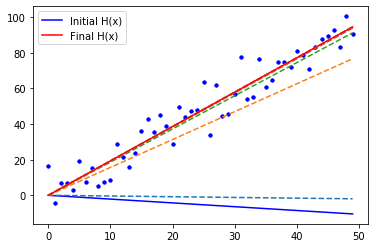

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

import time

logdir = "./summary/regression"
now = time.strftime("%Y%m%d-%H%M%S")
writer = tf.summary.create_file_writer(logdir + '/' + now)

m = 50 #sample count
TRUE_W = 2

X = tf.convert_to_tensor(range(m), tf.float32)
y = X  * TRUE_W + 0 # W = 2, b=0(bias 생략)
y = y + 10 * tf.random.normal((m,)) # adding noise

plt.plot(X, y, 'b.')


plt.plot(X, y, 'b.')

W = tf.Variable(tf.random.normal([1]))
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W.numpy())

learning_rate = 0.00005
suspend = 0.00001
old_dW = None
epochs = 1000

with writer.as_default():
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            hypothesis = W * X 
            loss = hypothesis - y
            cost = tf.reduce_mean(tf.square(loss))
            #cost = 1/m * np.sum(loss**2)
            dW = tape.gradient(cost, W)
            #dW=  2/m * np.sum(loss * X)
            if old_dW is not None and abs(dW - old_dW) < suspend:
                print('suspended:', epoch)
                break
            old_dW = dW
            # W.assign(W - learning_rate * dW)
            W.assign_sub(learning_rate * dW)
            if epoch %20 == 0:
                print('epoch:',epoch,' cost:',cost.numpy(),' dW:',dW.numpy(), ' W:', W.numpy())
                plt.plot(X, W*X, '--')
                tf.summary.scalar('Cost', cost, step=epoch)
print('Final W:', W.numpy())
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()

In [15]:
!ls summary/regression

20191028-214258
20191028-214308
